In [63]:
import pandas as pd
!pip install numpy pandas
!pip install openpyxl #attribute to install excel reading
%pip install matplotlib seaborn plotly seaborn yfinance statsmodel.api
%pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pandas import to_datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#attribute'

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#attribute'

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodel.api (from versions: none)
ERROR: No matching distribution found for statsmodel.api

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [64]:
#reading in all the cleaned dataframes

Inflation_diff = pd.read_csv('Inflation_diff.csv')
Interest_diff = pd.read_csv('Interest_diff.csv')
Current_account_diff = pd.read_csv('Current_account_diff.csv')
swaps_df = pd.read_csv('merged_df_month_year.csv')

In [65]:
#now run the regressiosn since all the data is ready, explore !!!!!

In [66]:
#checking if the dataframes have the same number of rows
print(f"Inflation_diff rows: {len(Inflation_diff)}")
print(f"Interest_diff rows: {len(Interest_diff)}")
print(f"Current_account_diff rows: {len(Current_account_diff)}")
print(f"swaps_df rows: {len(swaps_df)}")


Inflation_diff rows: 235
Interest_diff rows: 235
Current_account_diff rows: 235
swaps_df rows: 235


In [67]:
#lets check the first and last dates
print(f"Inflation_diff first date: {Inflation_diff['Date'].min()}")
print(f"Inflation_diff last date: {Inflation_diff['Date'].max()}")
print(f"Interest_diff first date: {Interest_diff['Date'].min()}")
print(f"Interest_diff last date: {Interest_diff['Date'].max()}")
print(f"Current_account_diff first date: {Current_account_diff['Date'].min()}")
print(f"Current_account_diff last date: {Current_account_diff['Date'].max()}")
print(f"swaps_df first date: {swaps_df['month-year'].min()}")
print(f"swaps_df last date: {swaps_df['month-year'].max()}")
#now we see that the swaps_df has dates, lets change it to month_year format. 

Inflation_diff first date: 2006-01
Inflation_diff last date: 2025-07
Interest_diff first date: 2006-01
Interest_diff last date: 2025-07
Current_account_diff first date: 2006-01
Current_account_diff last date: 2025-07
swaps_df first date: 2006-01
swaps_df last date: 2025-07


In [68]:
#lets create a function to divide the dataframe into train and test sets, based on the date
def train_test_split_by_date(df, date_column, test_size=0.2):
    """
    Splits the dataframe into train and test sets based on the date.
    
    Parameters:
    df (DataFrame): The dataframe to split.
    date_column (str): The name of the date column.
    test_size (float): The proportion of the dataset to include in the test split.
    
    Returns:
    DataFrame: Train set.
    DataFrame: Test set.
    """
    df[date_column] = pd.to_datetime(df[date_column])
    cutoff_date = df[date_column].quantile(1 - test_size)
    
    train_set = df[df[date_column] < cutoff_date]
    test_set = df[df[date_column] >= cutoff_date]
    
    return train_set, test_set

train_test_split_by_date(Inflation_diff, 'Date')
train_set_inflation, test_set_inflation = train_test_split_by_date(Inflation_diff, 'Date')

train_test_split_by_date(Interest_diff, 'Date')
train_set_interest, test_set_interest = train_test_split_by_date(Interest_diff, 'Date')
train_test_split_by_date(Current_account_diff, 'Date')
train_set_current, test_set_current = train_test_split_by_date(Current_account_diff, 'Date')
train_test_split_by_date(swaps_df, 'month-year')
train_set_swaps, test_set_swaps = train_test_split_by_date(swaps_df, 'month-year')


poor fitting to test values, lets figure out our next steps

In [69]:
#train_test_split by timeseries, without any differencing methods

X1_inflation_train = train_set_inflation['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X2_interest_train = train_set_interest['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X3_current_account_train = train_set_current['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X_inflation_interest_current_train = np.hstack((X1_inflation_train, X2_interest_train, X3_current_account_train))
#test_values 
X1_inflation_test = test_set_inflation['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X2_interest_test = test_set_interest['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X3_current_account_test = test_set_current['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
# Combine the independent variables into a single 2D array
X_inflation_interest_current_test = np.hstack((X1_inflation_test, X2_interest_test, X3_current_account_test))



model_USDJPY = LinearRegression()
model_USDJPY.fit(X_inflation_interest_current_train, train_set_swaps['USDJPY_20Y'])

Y_pred_USDJPY = model_USDJPY.predict(X_inflation_interest_current_train)
# Now we can evaluate the model
print(model_USDJPY.score(X_inflation_interest_current_train, train_set_swaps['USDJPY_20Y']))
print(model_USDJPY.score(X_inflation_interest_current_test, test_set_swaps['USDJPY_20Y']))




0.33308654871471977
-2.6089431585511553


In [70]:
#train_test_split by timeseries, with pct differencing methods for swaps
#now lets try to convert the exchange rate data by returns, itll allow for stationary data
Y_train_USDJPY_pct = train_set_swaps['USDJPY_20Y'].pct_change()
Y_train_USDJPY_pct = Y_train_USDJPY_pct.fillna(0)  # Fill NaN values with 0

Y_test_USDJPY_pct = test_set_swaps['USDJPY_20Y'].pct_change()
Y_test_USDJPY_pct = Y_test_USDJPY_pct.fillna(0)

print(Y_train_USDJPY_pct.head())

#fitting the data

model_USDJPY = LinearRegression()
model_USDJPY.fit(X_inflation_interest_current_train, Y_train_USDJPY_pct)

Y_pred_USDJPY = model_USDJPY.predict(X_inflation_interest_current_train)
# Now we can evaluate the model
print(model_USDJPY.score(X_inflation_interest_current_train, Y_train_USDJPY_pct))
print(model_USDJPY.score(X_inflation_interest_current_test, Y_test_USDJPY_pct))


0    0.000000
1    0.020351
2   -0.004656
3   -0.003106
4   -0.043918
Name: USDJPY_20Y, dtype: float64
0.06918094097600258
-0.18127276282691795


In [71]:
print(X_inflation_interest_current_train)

[[ 4.49  4.29 -9.3 ]
 [ 4.49  4.49 -9.3 ]
 [ 4.59  4.59 -9.3 ]
 [ 4.79  4.79 -9.3 ]
 [ 4.94  4.94 -9.3 ]
 [ 4.99  4.99 -9.38]
 [ 4.99  4.99 -9.38]
 [ 5.    5.   -9.38]
 [ 5.    5.   -9.67]
 [ 5.    5.   -9.67]
 [ 5.    5.   -9.67]
 [ 4.99  4.99 -9.54]
 [ 5.    5.   -9.54]
 [ 4.76  4.76 -9.54]
 [ 4.76  4.76 -9.75]
 [ 4.75  4.75 -9.75]
 [ 4.75  4.75 -9.75]
 [ 4.75  4.75 -9.84]
 [ 4.76  4.76 -9.84]
 [ 4.52  4.52 -9.84]
 [ 4.44  4.44 -9.73]
 [ 4.26  4.26 -9.73]
 [ 3.99  3.99 -9.73]
 [ 3.74  3.74 -9.52]
 [ 3.44  3.44 -9.52]
 [ 2.48  2.48 -9.52]
 [ 2.11  2.11 -9.31]
 [ 1.78  1.78 -9.31]
 [ 1.48  1.48 -9.31]
 [ 1.5   1.5  -8.78]
 [ 1.51  1.51 -8.78]
 [ 1.5   1.5  -8.78]
 [ 1.31  1.31 -8.24]
 [ 0.67  0.67 -8.24]
 [ 0.09  0.09 -8.24]
 [ 0.06  0.06 -7.57]
 [ 0.05  0.05 -7.57]
 [ 0.12  0.12 -7.57]
 [ 0.08  0.08 -6.28]
 [ 0.05  0.05 -6.28]
 [ 0.08  0.08 -6.28]
 [ 0.11  0.11 -5.69]
 [ 0.06  0.06 -5.69]
 [ 0.06  0.06 -5.69]
 [ 0.05  0.05 -5.25]
 [ 0.02  0.02 -5.25]
 [ 0.02  0.02 -5.25]
 [ 0.02  0.02

In [72]:
# train_test_split by timeseries, with pct differencing methods for swaps, and then apply differencing to the independent variables
#copy the indepdent variables to a new df
Current_account_diff_imp3 = Current_account_diff.copy()
Inflation_diff_imp3 = Inflation_diff.copy()
Interest_diff_imp3 = Interest_diff.copy()

# Now we can apply differencing to the independent variables
Current_account_diff_imp3['USDJPY'] = Current_account_diff_imp3['USDJPY'].diff().fillna(0)
Inflation_diff_imp3['USDJPY'] = Inflation_diff_imp3['USDJPY'].diff().fillna(0)
Interest_diff_imp3['USDJPY'] = Interest_diff_imp3['USDJPY'].diff().fillna(0)

#split into trainign and test_set_current
train_set_current_diff_imp3, test_set_current_diff_imp3 = train_test_split_by_date(Current_account_diff_imp3, 'Date')
train_set_inflation_diff_imp3, test_set_inflation_diff_imp3 = train_test_split_by_date(Inflation_diff_imp3, 'Date')
train_set_interest_diff_imp3, test_set_interest_diff_imp3 = train_test_split_by_date(Interest_diff_imp3, 'Date')

# Now we can create the independent variables for the model
X1_inflation_diff_imp3_train = train_set_inflation_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X2_interest_diff_imp3_train = train_set_interest_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X3_current_account_diff_imp3_train = train_set_current_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X_inflation_interest_current_diff_imp3_train = np.hstack((X1_inflation_diff_imp3_train, X2_interest_diff_imp3_train, X3_current_account_diff_imp3_train))
#test values
X1_inflation_diff_imp3_test = test_set_inflation_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X2_interest_diff_imp3_test = test_set_interest_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
X3_current_account_diff_imp3_test = test_set_current_diff_imp3['USDJPY'].values.reshape(-1, 1)  # Reshape to 2D array
# Combine the independent variables into a single 2D array
X_inflation_interest_current_diff_imp3_test = np.hstack((X1_inflation_diff_imp3_test, X2_interest_diff_imp3_test, X3_current_account_diff_imp3_test))
#fitting the data
model_USDJPY_diff_imp3 = LinearRegression()
model_USDJPY_diff_imp3.fit(X_inflation_interest_current_diff_imp3_train, Y_train_USDJPY_pct)
Y_pred_USDJPY_diff_imp3_test= model_USDJPY_diff_imp3.predict(X_inflation_interest_current_diff_imp3_test) #wrong code, need to find the predicted returns for my  test set
Y_pred_USDJPY_diff_imp3_train = model_USDJPY_diff_imp3.predict(X_inflation_interest_current_diff_imp3_train) 
# Now we can evaluate the model
print(model_USDJPY_diff_imp3.score(X_inflation_interest_current_diff_imp3_train, Y_train_USDJPY_pct))
print(model_USDJPY_diff_imp3.score(X_inflation_interest_current_diff_imp3_test, Y_test_USDJPY_pct))



0.04263092233555965
-0.06540518067604428

-0.06540518067604428


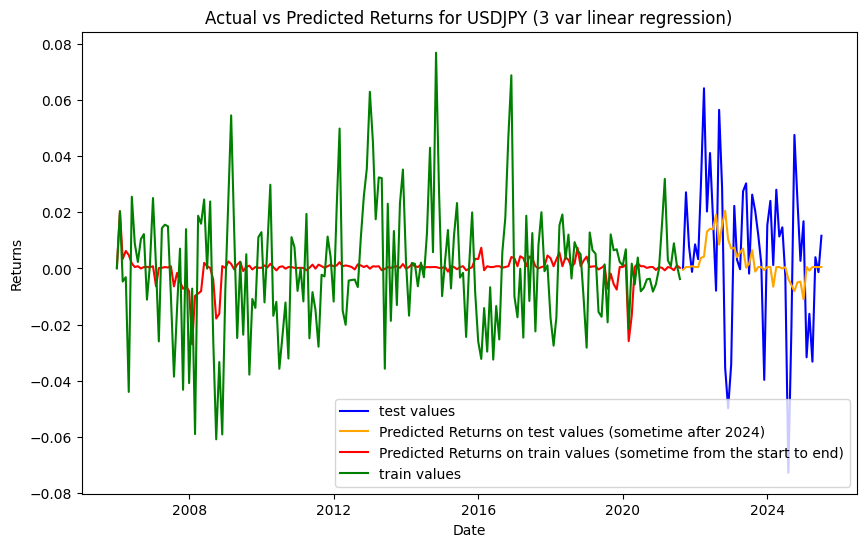

In [73]:
#lets plot the results for implementation three
plt.figure(figsize=(10, 6))
plt.plot(test_set_swaps['month-year'], Y_test_USDJPY_pct, label='test values', color='blue')
plt.plot(test_set_swaps['month-year'], Y_pred_USDJPY_diff_imp3_test, label='Predicted Returns on test values (sometime after 2024)', color='orange')
plt.plot(train_set_swaps['month-year'], Y_pred_USDJPY_diff_imp3_train, label = 'Predicted Returns on train values (sometime from the start to end)', color = 'red')
plt.plot(train_set_swaps['month-year'],Y_train_USDJPY_pct, label='train values', color='green')
#plt.plot(train_set_swaps['month-year'], Y_pred_USDJPY_diff_imp3, label='Predicted Returns', color='orange')
plt.title('Actual vs Predicted Returns for USDJPY (3 var linear regression)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


In [74]:
#from the above visualization, we can see that the model tends closer to the mean returns, some possible reasons may include
'''

Linear Model Limitation:
Linear regression predicts the average effect of features. If your train data is highly volatile or non-linear, the model will smooth out predictions and miss spikes.

Low Feature Correlation:
Your independent variables may not be strongly correlated with the target, so the model predicts values close to the mean.

Multicollinearity:
If your features are highly correlated with each other, the model coefficients may be unstable, reducing predictive accuracy.

Data Leakage or Misalignment:
If your features and target are not properly aligned (e.g., shifted by one period, mismatched dates), the model cannot learn the true relationship.

Incorrect Preprocessing:
Issues like improper differencing, scaling, or filling NaNs can distort the relationship between features and target.

Over-regularization:
If you use regularization (e.g., Ridge/Lasso), it can shrink coefficients too much, causing predictions to be flat.

Insufficient Model Complexity:
Real-world financial data often requires more complex models (e.g., tree-based, neural networks, time series models) to capture volatility and patterns.
'''

'\n\nLinear Model Limitation:\nLinear regression predicts the average effect of features. If your train data is highly volatile or non-linear, the model will smooth out predictions and miss spikes.\n\nLow Feature Correlation:\nYour independent variables may not be strongly correlated with the target, so the model predicts values close to the mean.\n\nMulticollinearity:\nIf your features are highly correlated with each other, the model coefficients may be unstable, reducing predictive accuracy.\n\nData Leakage or Misalignment:\nIf your features and target are not properly aligned (e.g., shifted by one period, mismatched dates), the model cannot learn the true relationship.\n\nIncorrect Preprocessing:\nIssues like improper differencing, scaling, or filling NaNs can distort the relationship between features and target.\n\nOver-regularization:\nIf you use regularization (e.g., Ridge/Lasso), it can shrink coefficients too much, causing predictions to be flat.\n\nInsufficient Model Complexit

In [75]:
#try other models more fitted to financial returns, lets try polynomial regression


In [76]:
X_train = X_inflation_interest_current_diff_imp3_train
X_test = X_inflation_interest_current_diff_imp3_test

Y_train= Y_train_USDJPY_pct
Y_test = Y_test_USDJPY_pct
poly = PolynomialFeatures(degree=4) # You can adjust the degree as needed
X_poly_train= poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
#fitting the model_USDJPY
model_poly = LinearRegression()
model_poly.fit(X_poly_train, Y_train)
#predicted for both test and train values
y_pred_train = model_poly.predict(X_poly_train)
y_pred_test = model_poly.predict(X_poly_test)  
#model scores
print(model_poly.score(X_poly_train, Y_train))
print(model_poly.score(X_poly_test, Y_test))


0.1506773649409352
-28.14892183888763


                            OLS Regression Results                            
Dep. Variable:             USDJPY_20Y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.731
Date:                Wed, 13 Aug 2025   Prob (F-statistic):             0.0452
Time:                        18:13:50   Log-Likelihood:                 455.51
No. Observations:                 188   AIC:                            -903.0
Df Residuals:                     184   BIC:                            -890.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.002      0.311      0.7

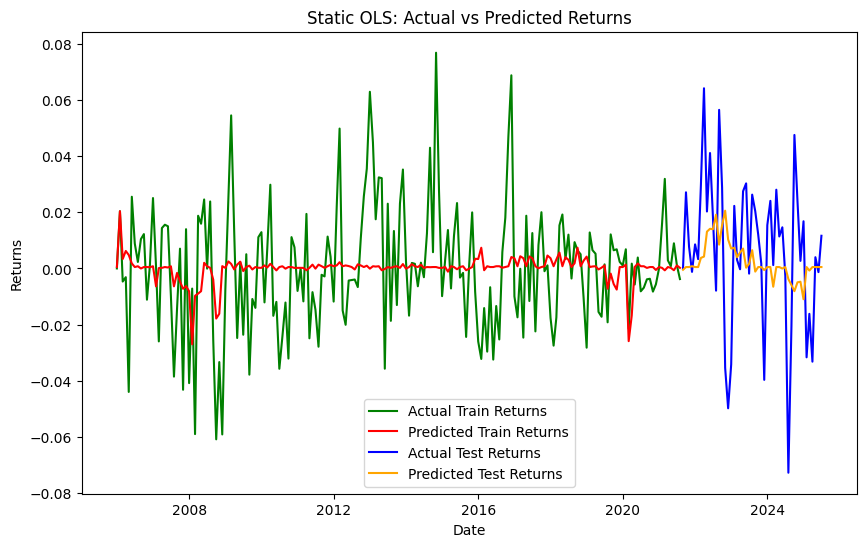

In [77]:
import statsmodels.api as sm

# 1. Prepare your factors and target
X = X_inflation_interest_current_diff_imp3_train  # shape: (n_samples, 3)
Y = Y_train_USDJPY_pct  # shape: (n_samples,)

# 2. Add constant (intercept) to factors
X_const = sm.add_constant(X)

# 3. Fit static OLS regression
model_ols = sm.OLS(Y, X_const).fit()

# 4. Print summary for interpretation
print(model_ols.summary())

# 5. Predict on train and test sets
Y_pred_train = model_ols.predict(sm.add_constant(X_inflation_interest_current_diff_imp3_train))
Y_pred_test = model_ols.predict(sm.add_constant(X_inflation_interest_current_diff_imp3_test))

# 6. Plot actual vs predicted returns
plt.figure(figsize=(10, 6))
plt.plot(train_set_swaps['month-year'], Y_train_USDJPY_pct, label='Actual Train Returns', color='green')
plt.plot(train_set_swaps['month-year'], Y_pred_train, label='Predicted Train Returns', color='red')
plt.plot(test_set_swaps['month-year'], Y_test_USDJPY_pct, label='Actual Test Returns', color='blue')
plt.plot(test_set_swaps['month-year'], Y_pred_test, label='Predicted Test Returns', color='orange')
plt.title('Static OLS: Actual vs Predicted Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

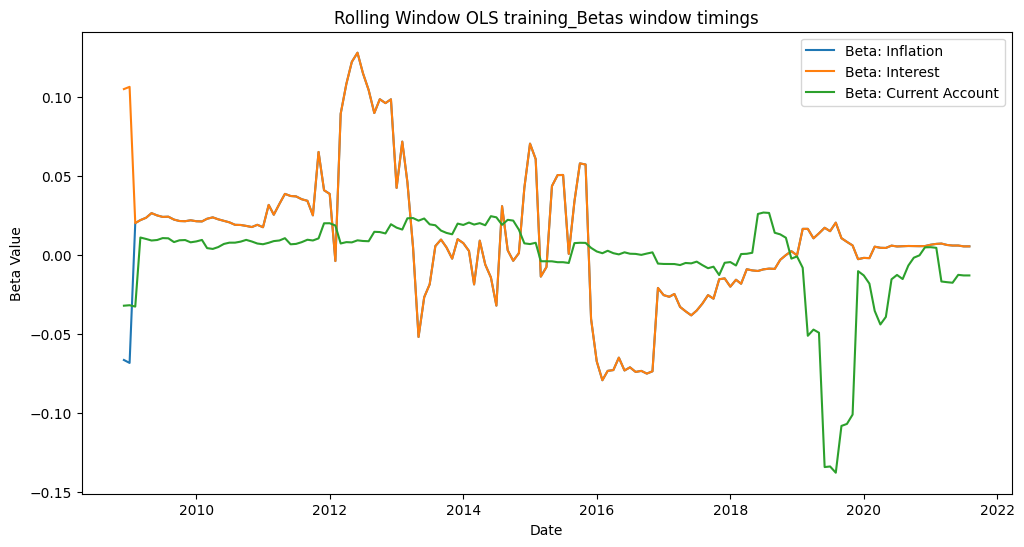

In [78]:
#Calculate rolling betas for the train set
import statsmodels.api as sm

window = 36 # rolling window size (months)
train_betas = []
train_dates = []

X = X_inflation_interest_current_diff_imp3_train
Y = Y_train_USDJPY_pct
date_index = train_set_swaps['month-year'].reset_index(drop=True)

for start in range(len(X) - window + 1):
    end = start + window
    X_window = X[start:end]
    Y_window = Y[start:end]
    X_window_const = sm.add_constant(X_window)
    model = sm.OLS(Y_window, X_window_const).fit()
    train_betas.append(model.params.values)
    train_dates.append(date_index[end-1])

train_betas = np.array(train_betas)
train_dates = np.array(train_dates)

# Plot time-varying betas
plt.figure(figsize=(12, 6))
plt.plot(train_dates, train_betas[:, 1], label='Beta: Inflation')
plt.plot(train_dates, train_betas[:, 2], label='Beta: Interest')
plt.plot(train_dates, train_betas[:, 3], label='Beta: Current Account')
plt.title('Rolling Window OLS training_Betas window timings')
plt.xlabel('Date')
plt.ylabel('Beta Value')
plt.legend()
plt.show()

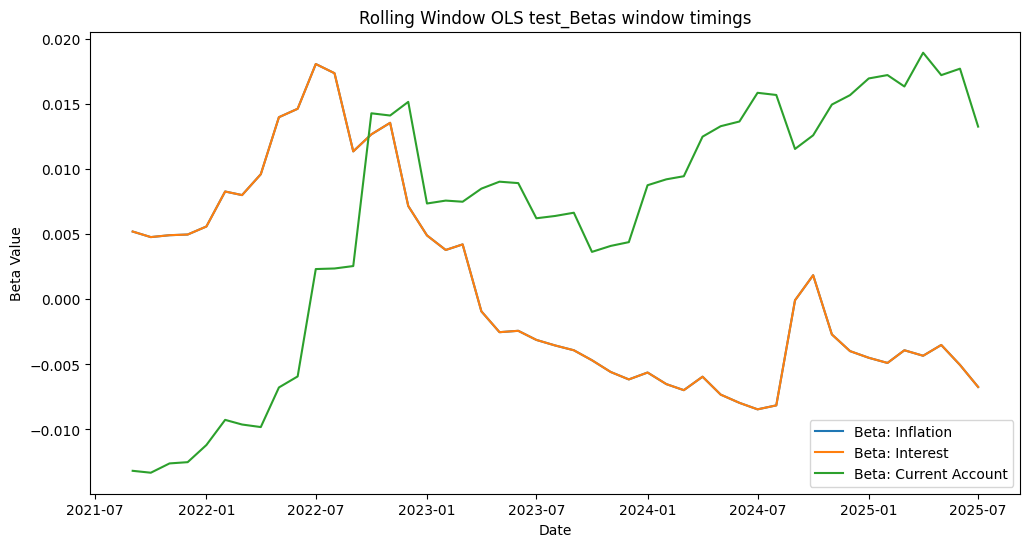

In [79]:
# Calculate rolling betas for the test set (out-of-sample, using only past data)

import statsmodels.api as sm

window = 36  # rolling window size
test_betas = []
test_dates = []

# Combine train and test features/targets for rolling calculation
X_all = np.vstack([X_inflation_interest_current_diff_imp3_train, X_inflation_interest_current_diff_imp3_test])
Y_all = np.concatenate([Y_train_USDJPY_pct, Y_test_USDJPY_pct])
date_all = np.concatenate([train_set_swaps['month-year'].values, test_set_swaps['month-year'].values])

test_start = len(X_inflation_interest_current_diff_imp3_train)
test_end = len(X_all)

for i in range(test_start, test_end):
    X_window = X_all[i-window:i]
    Y_window = Y_all[i-window:i]
    if len(X_window) == window:
        X_window_const = sm.add_constant(X_window)
        model = sm.OLS(Y_window, X_window_const).fit()
        test_betas.append(model.params)
        test_dates.append(date_all[i])

test_betas = np.array(test_betas)
test_dates = np.array(test_dates)

# Plot time-varying betas
plt.figure(figsize=(12, 6))
plt.plot(test_dates, test_betas[:, 1], label='Beta: Inflation')
plt.plot(test_dates, test_betas[:, 2], label='Beta: Interest')
plt.plot(test_dates, test_betas[:, 3], label='Beta: Current Account')
plt.title('Rolling Window OLS test_Betas window timings')
plt.xlabel('Date')
plt.ylabel('Beta Value')
plt.legend()
plt.show()
# test_betas now contains rolling betas for the test set, aligned with test_dates

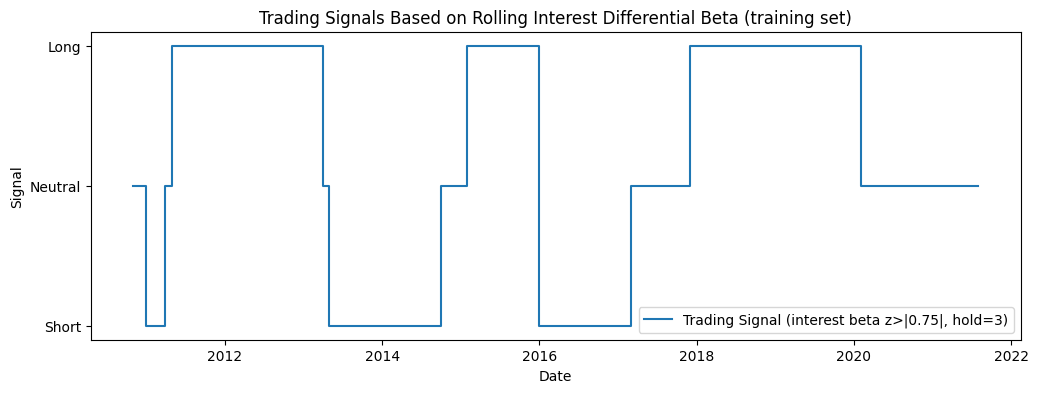

In [80]:
# Calculating the signals for the train set (only for interest rate diff)
# 1. Set a threshold for signal generation (original idea kept below, but replaced with z-threshold on smoothed beta)
# long_threshold = 0.1
# short_threshold = 0.1

# Use interest beta (column 2) and align to window ends
dates_train = pd.to_datetime(train_set_swaps['month-year'].values)
interest_beta_train = pd.Series(train_betas[:, 2], index=dates_train[window-1:])

# Smooth and standardize (reduces noise and regime shifts)
beta_smooth = interest_beta_train.ewm(span=6, adjust=False).mean()
beta_z = (beta_smooth - beta_smooth.rolling(24).mean()) / (beta_smooth.rolling(24).std() + 1e-8)
beta_z = beta_z.dropna()

# Align train returns to the same dates and use next-period return (no look-ahead)
train_returns = pd.Series(Y_train_USDJPY_pct.values, index=dates_train)
ret_aligned = train_returns.reindex(beta_z.index)
ret_fwd = ret_aligned.shift(-1)

# Pick a coarse z-threshold via a time split inside the train set (reduces overfitting)
z_grid = np.arange(0.5, 1.6, 0.25)
split = int(len(beta_z) * 0.7)
beta_cal, beta_val = beta_z.iloc[:split], beta_z.iloc[split:]
ret_cal, ret_val = ret_fwd.iloc[:split], ret_fwd.iloc[split:]

def sharpe_for(z):
    sig = np.sign(beta_cal.where(beta_cal.abs() >= z, 0)).astype(int)
    strat = (sig * ret_cal).dropna()
    return strat.mean() / (strat.std(ddof=0) + 1e-12)

best_z = max(z_grid, key=sharpe_for)

# Final signals on full train with a small minimum holding period to reduce churn
raw_sig = np.sign(beta_z.where(beta_z.abs() >= best_z, 0)).astype(int)
min_hold = 3  # months
sig = raw_sig.replace(0, np.nan).ffill(limit=min_hold-1).fillna(0).astype(int)

signals = sig.values
train_signals = signals  # optional alias for downstream checks
train_dates = beta_z.index.values  # used for plotting and forward test

# 3. Plot signals over time (kept from your original cell)
plt.figure(figsize=(12, 4))
plt.plot(train_dates, signals, drawstyle='steps-post',
         label=f'Trading Signal (interest beta z>|{best_z:.2f}|, hold={min_hold})')
plt.title('Trading Signals Based on Rolling Interest Differential Beta (training set)')
plt.xlabel('Date')
plt.ylabel('Signal')
plt.yticks([-1, 0, 1], ['Short', 'Neutral', 'Long'])
plt.legend()
plt.show()

# 4. (Optional) You can apply this logic to other betas or combine signals for multi-factor strategies.

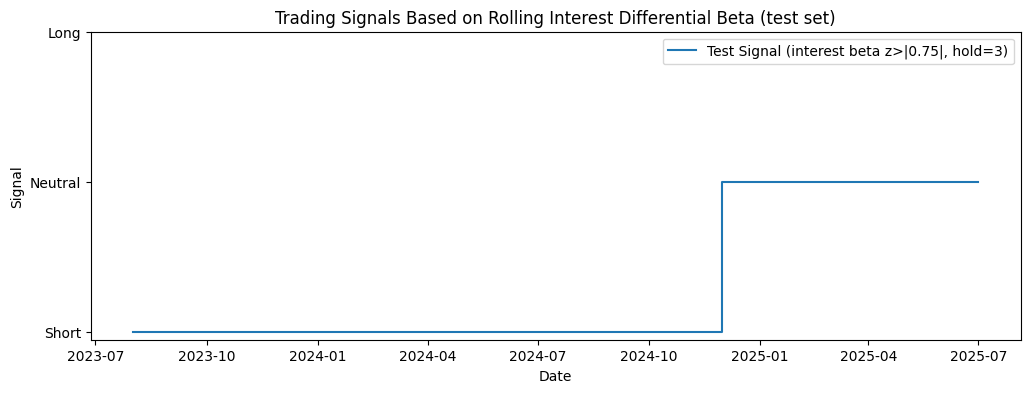

In [98]:
# Trading signals for the test set (derived from rolling test betas; uses train-chosen params)

# 1) Take interest beta (column 2) from test_betas and align to dates
interest_beta_test = pd.Series(test_betas[:, 2], index=pd.to_datetime(test_dates))

# 2) Smooth and standardize like the train side (uses only past test info)
beta_smooth_test = interest_beta_test.ewm(span=6, adjust=False).mean()
beta_z_test = (beta_smooth_test - beta_smooth_test.rolling(24).mean()) / (beta_smooth_test.rolling(24).std() + 1e-8)
beta_z_test = beta_z_test.dropna()

# 3) Apply the train-selected threshold and minimum holding period
raw_sig_test = np.sign(beta_z_test.where(beta_z_test.abs() >= best_z, 0)).astype(int)
sig_test = raw_sig_test.replace(0, np.nan).ffill(limit=min_hold-1).fillna(0).astype(int)

# 4) Export for downstream cells
test_signals = sig_test.values
test_signal_dates = sig_test.index.values  # dedicated dates for signals

# 5) Plot test signals
plt.figure(figsize=(12, 4))
plt.plot(test_signal_dates, test_signals, drawstyle='steps-post',
         label=f'Test Signal (interest beta z>|{best_z:.2f}|, hold={min_hold})')
plt.title('Trading Signals Based on Rolling Interest Differential Beta (test set)')
plt.xlabel('Date'); plt.ylabel('Signal'); plt.yticks([-1, 0, 1], ['Short', 'Neutral', 'Long'])
plt.legend(); plt.show()


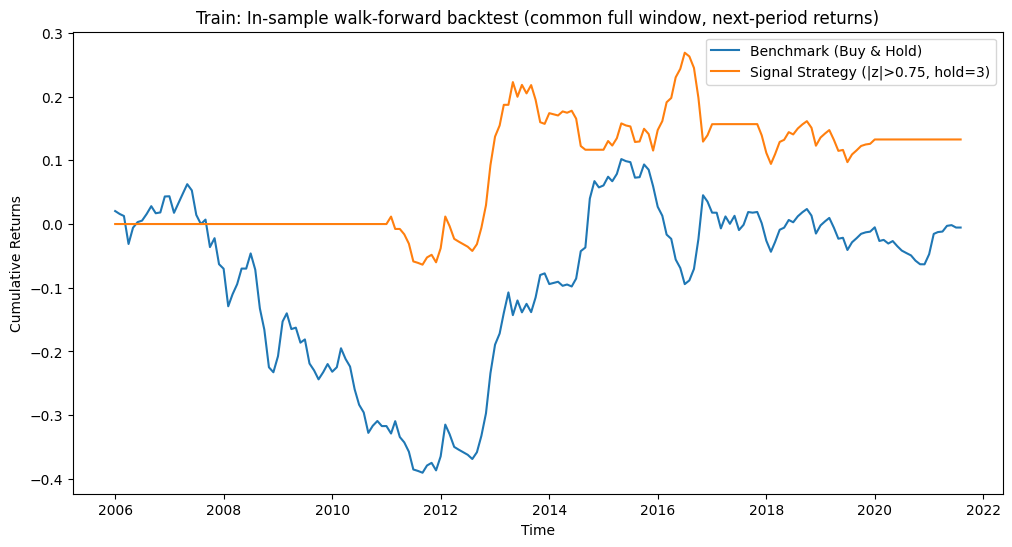

Chosen z-threshold: 0.75
Strategy total return: 0.13271158878085698
Benchmark total return: -0.005513117813409463
Strategy Sharpe ratio: 0.04813222466179513


In [99]:
# Forward testing with a common full window starting at the first available return
# ...existing code...

# 1) Build full-window series (start at first train return)
full_dates = pd.to_datetime(train_set_swaps['month-year'].values)
ret_full = pd.Series(Y_train_USDJPY_pct.values, index=full_dates)

# Use next-period return for no look-ahead
ret_fwd_full = ret_full.shift(-1)             # t -> t+1
ret_fwd_full = ret_fwd_full.fillna(0.0)       # last step has no next period

# 2) Put signals on the same full window; neutral (0) before/after they exist
sig_series = pd.Series(signals, index=pd.to_datetime(train_dates))  # from signal gen cell
sig_full = sig_series.reindex(full_dates).fillna(0).astype(int)

# 3) Strategy and benchmark on the same dates
strategy_returns_full = sig_full.values * ret_fwd_full.values
benchmark_returns_full = ret_fwd_full.values

# 4) Plot cumulative returns on the same window
plt.figure(figsize=(12, 6))
plt.plot(full_dates, np.cumsum(benchmark_returns_full), label='Benchmark (Buy & Hold)')
plt.plot(full_dates, np.cumsum(strategy_returns_full),
         label=f'Signal Strategy (|z|>{best_z:.2f}, hold={min_hold})')
plt.title('Train: In-sample walk-forward backtest (common full window, next-period returns)')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# 5) Summary stats on the full window
eps = 1e-12
print("Chosen z-threshold:", float(best_z))
print("Strategy total return:", float(np.sum(strategy_returns_full)))
print("Benchmark total return:", float(np.sum(benchmark_returns_full)))
print("Strategy Sharpe ratio:", float(np.mean(strategy_returns_full) / (np.std(strategy_returns_full) + eps)))

# Optional: if you prefer compounding rather than summing, replace np.cumsum with:
# cum_bench = np.cumprod(1 + benchmark_returns_full) - 1
# cum_strat = np.cumprod(1 + strategy_returns_full) - 1
# ...existing code...


In [83]:
#evaluating the model, maybe changing thresholds to short below 0.1 ? what to do when the signal gives no information ? when the signal ==1 ?

In [84]:
print(Y_train_USDJPY_pct,  Y_train_USDJPY_forward_dates)

0      0.000000
1      0.020351
2     -0.004656
3     -0.003106
4     -0.043918
         ...   
183    0.002889
184    0.000808
185    0.008942
186    0.001138
187   -0.003776
Name: USDJPY_20Y, Length: 188, dtype: float64 DatetimeIndex(['2010-11-01', '2010-12-01', '2011-01-01', '2011-02-01',
               '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01',
               '2011-07-01', '2011-08-01',
               ...
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01',
               '2021-07-01', '2021-08-01'],
              dtype='datetime64[ns]', length=130, freq=None)


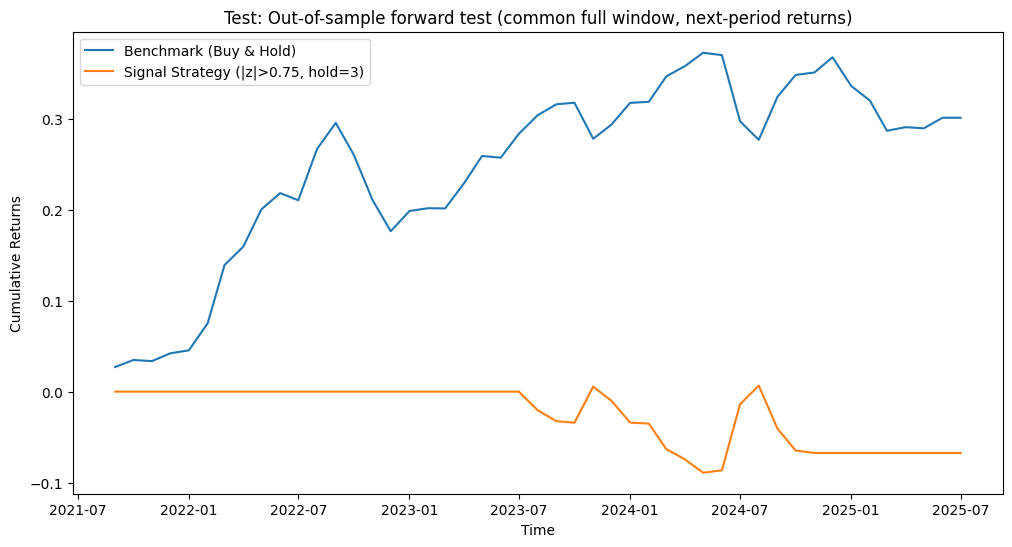

Chosen z-threshold (from train): 0.75
Test Strategy total return: -0.06746305606704606
Test Benchmark total return: 0.3013641675865869
Test Strategy Sharpe ratio: -0.08791550933142428


In [101]:
# Forward testing on the test set with a common full window starting at the first test return

# 1) Build full-window series (start at first test return)
test_full_dates = pd.to_datetime(test_set_swaps['month-year'].values)
ret_full_test = pd.Series(Y_test_USDJPY_pct.values, index=test_full_dates)

# Use next-period return for no look-ahead
ret_fwd_test_full = ret_full_test.shift(-1)     # t -> t+1
ret_fwd_test_full = ret_fwd_test_full.fillna(0.0)

# 2) Put test signals on the same full window; neutral (0) before/after they exist
# ...existing code...
# 2) Put test signals on the same full window; neutral (0) before/after they exist
sig_series_test = pd.Series(test_signals, index=pd.to_datetime(test_signal_dates))  # was: test_dates
sig_full_test = sig_series_test.reindex(test_full_dates).fillna(0).astype(int)
# ...existing code...

# 3) Strategy and benchmark on the same dates (common window)
strategy_returns_test_full = sig_full_test.values * ret_fwd_test_full.values
benchmark_returns_test_full = ret_fwd_test_full.values

# 4) Plot cumulative returns on the same window
plt.figure(figsize=(12, 6))
plt.plot(test_full_dates, np.cumsum(benchmark_returns_test_full), label='Benchmark (Buy & Hold)')
plt.plot(test_full_dates, np.cumsum(strategy_returns_test_full),
       label=f'Signal Strategy (|z|>{best_z:.2f}, hold={min_hold})')
plt.title('Test: Out-of-sample forward test (common full window, next-period returns)')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# 5) Summary stats on the full test window
eps = 1e-12
print('Chosen z-threshold (from train):', float(best_z))
print('Test Strategy total return:', float(np.sum(strategy_returns_test_full)))
print('Test Benchmark total return:', float(np.sum(benchmark_returns_test_full)))
print('Test Strategy Sharpe ratio:', float(np.mean(strategy_returns_test_full) / (np.std(strategy_returns_test_full) + eps)))